# Plotting the results for Zero height isotherm

In [1]:
# importing 
import matplotlib.pyplot as plt 
import os
import xarray as xr


In [2]:
# make the percentiles from the netcdf file 
def percentiles_from_nc(file, fileout,pctl0, pctl1,pctl2):
    cmd = "cdo -L -b f32 yearpctl,"+str(pctl0)+" "+file+" -yearmin  "+file+" -yearmax  "+file+" "+fileout+str(pctl0)+".nc"
    os.system(cmd)
    cmd = "cdo -L -b f32 yearpctl,"+str(pctl1)+" "+file+" -yearmin  "+file+" -yearmax  "+file+" "+fileout+str(pctl1)+".nc"
    os.system(cmd)
    cmd = "cdo -L -b f32 yearpctl,"+str(pctl2)+" "+file+" -yearmin  "+file+" -yearmax  "+file+" "+fileout+str(pctl2)+".nc"
    os.system(cmd)
    cmd = "cdo -L -b f32 yearmean,"+str(pctl0)+" "+file+" -yearmin  "+file+" -yearmax  "+file+" "+fileout+str(pctl0)+".nc"
    os.system(cmd)
def early_stats(file, fileout):
    cmd = "cdo -O -L -b f32 yearmean  -selseas,AMJJAS "+file+" "+fileout
    os.system(cmd)
    
    

In [51]:
#percentiles_from_nc("/home/fallah/Documents/SCRIPTS/DeepSD/ploting/output/height_zdi_1980_2016_90arcsec.nc",
#                    "/home/fallah/Documents/SCRIPTS/DeepSD/ploting/output/height_zdi_1980_2016_90arcsec_pctls",
#                    25, 50,75)
early_stats("/home/fallah/Documents/SCRIPTS/DeepSD/ploting/output/height_zdi_1980_2016_90arcsec.nc",
            "/home/fallah/Documents/SCRIPTS/DeepSD/ploting/output/height_zdi_1980_2016_90arcsec_JJA.nc")

cdo(1) selseason: Process started
cdo(1) selseason: Processed 1 variable over 12784 timesteps.
cdo    yearmean: Processed 6405 values from 1 variable over 6439 timesteps [0.29s 28MB].


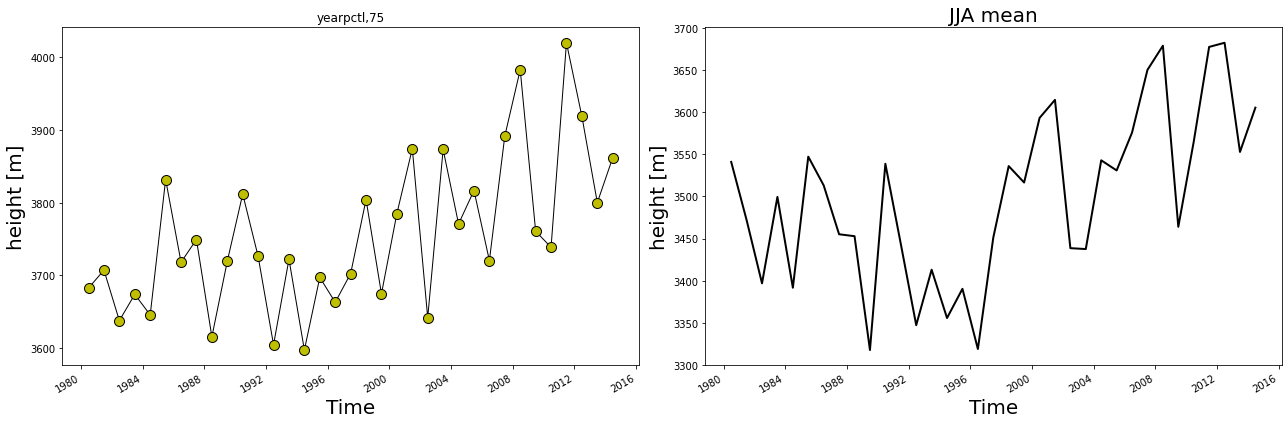

In [52]:
# read the data: 

ds_disk_0 = xr.open_dataset("/home/fallah/Documents/SCRIPTS/DeepSD/ploting/output/height_zdi_1980_2016_90arcsec_pctls25.nc").load()
ds_disk_1 = xr.open_dataset("/home/fallah/Documents/SCRIPTS/DeepSD/ploting/output/height_zdi_1980_2016_90arcsec_pctls50.nc").load()
ds_disk_2 = xr.open_dataset("/home/fallah/Documents/SCRIPTS/DeepSD/ploting/output/height_zdi_1980_2016_90arcsec_pctls75.nc").load()

jja = xr.open_dataset("/home/fallah/Documents/SCRIPTS/DeepSD/ploting/output/height_zdi_1980_2016_90arcsec_JJA.nc")

fig, axs = plt.subplots(ncols=2,figsize=(18,6))
#jja.tasmin[:,0,0].plot.line(color='k', marker="o",
#                                  markersize=10,lw=1, markerfacecolor='r',ax=axs[1])
jja.tasmin[:,0,0].plot.line(color='k',lw=2,ax=axs[1])
#ds_disk_1.tasmin[:,0,0].plot.line(color='k',lw=3)
ds_disk_2.tasmin[:,0,0].plot.line(color='k', marker="o",
                                  markersize=10,lw=1, markerfacecolor='y',ax=axs[0])

axs[0].set_title("yearpctl,75");
axs[0].set_ylabel("height [m]", fontsize=20)
axs[0].set_xlabel("Time", fontsize=20)

axs[1].set_title("JJA mean", fontsize=20);
axs[1].set_ylabel("height [m]", fontsize=20)
axs[1].set_xlabel("Time", fontsize=20)

plt.tight_layout()
ds_disk_0.close()
ds_disk_1.close()
ds_disk_2.close()
jja.close()

## Calculate the zero height isotherm from historical runs of CMIP6

In [53]:
import matplotlib.pyplot as plt
import os 
import xarray as xr
import numpy as np
import glob
def zero_isotherm_ts(topo="../chelsa-w5e5v1.0_obsclim_orog_90arcsec_Zarafshan.nc",
                     temp='../outputs/chelsa_CA_1980_2014_JJA.nc', delta=.1):
    
    '''
    This function calculates the height of the zero isotherm (the altitude at which the temperature is 0°C) using two input NetCDF files,
    one containing topography data and another containing minimum daily temperature data.
    The function uses the xarray library to open and load the data from the input files.
    It then extracts the topography data from the orog variable in the topo_data object,
    and the minimum daily temperature data from the tasmin variable in the temp_data object.
    The function then calculates the zero height isotherm by finding the nearest height to zero
    for each time step in the minimum daily temperature data. It does this by using numpy's 
    percentile function to find the 50th percentile (i.e. the median) of the topography data
    within a range of +/- delta around 273.15 K (0°C), where delta is a user-defined parameter.
    The function returns an array of the same length as the number of time steps in the input
    temperature data, containing the height of the zero isotherm at each time step.
    Note that the function assumes that the input NetCDF files are structured in a specific way,
    with the topography data stored in the orog variable and the minimum daily temperature data stored
    in the tasmin variable. If the files have different variable names or structures, 
    the function may need to be modified to extract the appropriate data.
    '''
    
   
    # delta is the range around zero
    delta=delta
    # Load the topography data
    topo_data = xr.open_dataset(topo).load()
    topo = topo_data.orog.values
    
    # Load the minimum daily temperature data
    temp_data = xr.open_dataset(temp).load()
    temp = temp_data.tasmin.values
    temp_data.close()
    # Calculate the zero height isotherm
    # Find the nearest height to zero
    zero_height = np.nan * np.ones(temp.shape[0])
    for i in range(temp.shape[0]):
        zero_height[i] = np.nanpercentile(topo[(temp[i,:,:].squeeze()<=(273.15+delta))  & 
                                         (temp[i,:,:].squeeze()>=(273.15-delta))],50)
    return zero_height
     
    

predicted_CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Process started
cdo(1) selseason: Processed 1 variable over 13149 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.66s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.AWI.AWI-CM-1-1-MR.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13149 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.70s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.NCC.NorESM2-LM.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.71s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.CCCma.CanESM5.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.65s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.NOAA-GFDL.GFDL-ESM4.historical.day.gr1_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.72s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.CSIRO.ACCESS-ESM1-5.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13149 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.74s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.MPI-M.MPI-ESM1-2-LR.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13149 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.76s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.NOAA-GFDL.GFDL-CM4.historical.day.gr2_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.71s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.KIOST.KIOST-ESM.historical.day.gr1_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.67s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.MRI.MRI-ESM2-0.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13149 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.68s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.historical.day.gr_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13149 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.68s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.NOAA-GFDL.GFDL-CM4.historical.day.gr1_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.66s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.NUIST.NESM3.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13149 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.67s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.NASA-GISS.GISS-E2-1-G.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.65s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.EC-Earth-Consortium.EC-Earth3.historical.day.gr_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13149 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.69s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.CAS.FGOALS-g3.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.75s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.MPI-M.MPI-ESM1-2-HR.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13149 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.78s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.INM.INM-CM5-0.historical.day.gr1_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.75s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.MIROC.MIROC6.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13149 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.70s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.AWI.AWI-ESM-1-1-LR.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13149 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.72s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.SNU.SAM0-UNICON.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.66s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.INM.INM-CM4-8.historical.day.gr1_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.67s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.BCC.BCC-ESM1.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.70s 33MB].
cdo(1) selseason: Process started


predicted_CMIP.NCC.NorESM2-MM.historical.day.gn_1980_2014.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 13140 timesteps.
cdo    yearmean: Processed 35838720 values from 1 variable over 6622 timesteps [0.69s 33MB].
cdo(1) selseason: Process started


24 -------------------
predicted_ScenarioMIP.CCCma.CanESM5.ssp126.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.55s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.INM.INM-CM5-0.ssp126.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.45s 44MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.INM.INM-CM4-8.ssp126.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.52s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.AWI.AWI-CM-1-1-MR.ssp126.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.50s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.ssp126.day.gr_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.61s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.MRI.MRI-ESM2-0.ssp126.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.66s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.NUIST.NESM3.ssp126.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.65s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp126.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.64s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.EC-Earth-Consortium.EC-Earth3.ssp126.day.gr_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.65s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.NCC.NorESM2-MM.ssp126.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.50s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.CMCC.CMCC-ESM2.ssp126.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.53s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.MIROC.MIROC6.ssp126.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.66s 44MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.CAS.FGOALS-g3.ssp126.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.65s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.KIOST.KIOST-ESM.ssp126.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.59s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp126.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.64s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.NCC.NorESM2-MM.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.44s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp245.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.45s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp245.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.58s 44MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.MRI.MRI-ESM2-0.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.46s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.CAS.FGOALS-g3.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.47s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.EC-Earth-Consortium.EC-Earth3.ssp245.day.gr_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.47s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.ssp245.day.gr_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.48s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.CMCC.CMCC-ESM2.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.47s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.KIOST.KIOST-ESM.ssp245.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.53s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.MIROC.MIROC6.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.64s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.68s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.AWI.AWI-CM-1-1-MR.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.61s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.57s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.INM.INM-CM4-8.ssp245.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.68s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.CCCma.CanESM5.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.59s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.NCC.NorESM2-LM.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.47s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.AS-RCEC.TaiESM1.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.46s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.INM.INM-CM5-0.ssp245.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.46s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.EC-Earth-Consortium.EC-Earth3-CC.ssp245.day.gr_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.51s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp245.day.gr2_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.78s 44MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.NUIST.NESM3.ssp245.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.51s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.NCC.NorESM2-MM.ssp370.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.47s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.MRI.MRI-ESM2-0.ssp370.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.51s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.ssp370.day.gr_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.51s 44MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.INM.INM-CM5-0.ssp370.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.51s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp370.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.53s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.CAS.FGOALS-g3.ssp370.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.51s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.INM.INM-CM4-8.ssp370.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.55s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.CCCma.CanESM5.ssp370.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.53s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.NCC.NorESM2-LM.ssp370.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.50s 44MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.AWI.AWI-CM-1-1-MR.ssp370.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.51s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp370.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.53s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.CMCC.CMCC-ESM2.ssp370.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.54s 44MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.EC-Earth-Consortium.EC-Earth3.ssp370.day.gr_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.55s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.EC-Earth-Consortium.EC-Earth3-AerChem.ssp370.day.gr_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.55s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.MIROC.MIROC6.ssp370.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.61s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.MIROC.MIROC6.ssp585.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.52s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp585.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.55s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.AWI.AWI-CM-1-1-MR.ssp585.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.51s 44MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.CAS.FGOALS-g3.ssp585.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.50s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.NCC.NorESM2-MM.ssp585.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.52s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.INM.INM-CM5-0.ssp585.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.57s 45MB].
cdo(1) selseason: Process started


predicted_ScenarioMIP.NOAA-GFDL.GFDL-ESM4.ssp585.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.58s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.NUIST.NESM3.ssp585.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.57s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp585.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.54s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.NCC.NorESM2-LM.ssp585.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.55s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.ssp585.day.gr_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.57s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.60s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.51s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.NOAA-GFDL.GFDL-CM4.ssp585.day.gr2_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.49s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.MRI.MRI-ESM2-0.ssp585.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31046 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.55s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.CCCma.CanESM5.ssp585.day.gn_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.50s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.KIOST.KIOST-ESM.ssp585.day.gr1_2015_2044.nc  is being processed........


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.55s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
cdo(1) selseason: Process started


predicted_ScenarioMIP.INM.INM-CM4-8.ssp585.day.gr1_2015_2044.nc  is being processed........
18 -------------------


cdo(1) selseason: Processed 1 variable over 31025 timesteps.
cdo    yearmean: Processed 84619200 values from 1 variable over 15639 timesteps [1.51s 45MB].
/home/fallah/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1558: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


0

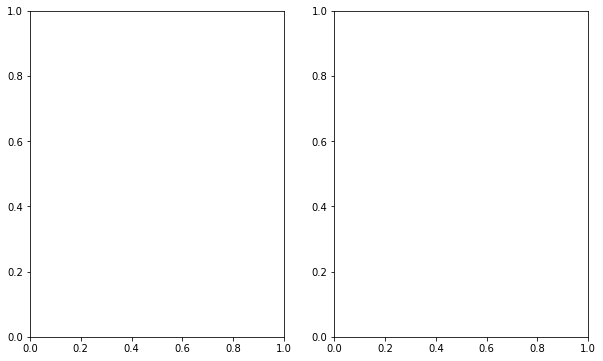

In [54]:


# 
zero_height = zero_isotherm_ts("../chelsa-w5e5v1.0_obsclim_orog_90arcsec_Zarafshan.nc",
                               "../outputs/chelsa_CA_1980_2014_JJA.nc")
dir_cmip="/home/fallah/Documents/SCRIPTS/DeepSD/notebooks/"
fig, axs = plt.subplots(ncols=2,figsize=(10,6))

counter = 0
zero_height_all = np.nan * np.ones((24,zero_height.shape[0]))
for file in os.listdir(dir_cmip):
    if file.endswith("_1980_2014.nc"):
        
        print(file, " is being processed........")
    
        
        cmd = "cdo -yearmean -selseas,AMJJAS "+dir_cmip+file+" ./"+file+"_AMJJAS.nc"
        os.system(cmd)
        zero_height_hist = zero_isotherm_ts("../chelsa-w5e5v1.0_obsclim_orog_90arcsec_Zarafshan.nc",
                                       "./"+file+"_AMJJAS.nc")
        
        
        
        
        
        
        
        #axs.plot(range(1980,2015),zero_height_hist,'g-',alpha=.31)
        zero_height_all[counter,:] = zero_height_hist
        counter +=1
print(counter,'-------------------')


dir_cmip="/home/fallah/Documents/SCRIPTS/DeepSD/notebooks/"


counter_ssp = 0
#zero_height_all_ssp_70_99 = np.nan * np.ones((4,100,30))
#zero_height_all_ssp_45_69 = np.nan * np.ones((4,100,25))
#zero_height_all_ssp_15_44 = np.nan * np.ones((4,100,30))
zero_height_all_ssp_2015_2099 = np.nan * np.ones((4,25,85))

for ssp in ["ssp126","ssp245","ssp370","ssp585"]:
    counter = 0
    for file in os.listdir(dir_cmip):
        if file.endswith("_2015_2044.nc"):
        
            
            if ssp in file : 
                
            
                print(file, " is being processed........")
                ###############################
                # merge time slices 
                # run once and you have them !!!!!!!!!!!!!!!!!!!!!
                ###############################
                #cmd = "cdo -mergetime "+dir_cmip+file+" "+dir_cmip+file[:-13]+"_2045_2069.nc"+" "+dir_cmip+file[:-13]+"_2070_2099.nc "+dir_cmip+file[:-13]+"_2015_2099.nc"
                #os.system(cmd)
                ###############################
                file = file[:-13]+"_2015_2099.nc"
                cmd = "cdo -yearmean -selseas,AMJJAS "+dir_cmip+file+" ./"+file+"_AMJJAS.nc"
                os.system(cmd)
                zero_height_hist = zero_isotherm_ts("../chelsa-w5e5v1.0_obsclim_orog_90arcsec_Zarafshan.nc",
                                               "./"+file+"_AMJJAS.nc")
                
                
                
                
                
                
                
               
                zero_height_all_ssp_2015_2099[counter_ssp,counter,:] = zero_height_hist
                counter +=1
#        if file.endswith("_2045_2069.nc"):
#            
#            if ssp in file : 
#                
#            
#                print(file, " is being processed........")
#            
#                
#                cmd = "cdo -yearmean -selmon,4,5,6,7,8,9 "+dir_cmip+file+" ./"+file+"_AMJJAS.nc"
#                os.system(cmd)
#                zero_height_hist = zero_isotherm_ts("../chelsa-w5e5v1.0_obsclim_orog_90arcsec_Zarafshan.nc",
#                                               "./"+file+"_AMJJAS.nc")
#                
#                
#                
#                
#                
#                
#                
#                #axs.plot(range(1980,2015),zero_height_hist,'g-',alpha=.31)
#                zero_height_all_ssp_45_69[counter_ssp,counter,:] = zero_height_hist
#                counter +=1  
#        if file.endswith("_2015_2044.nc"):
#            
#            if ssp in file : 
#                
#            
#                print(file, " is being processed........")
#            
#                
#                cmd = "cdo -yearmean -selmon,4,5,6,7,8,9 "+dir_cmip+file+" ./"+file+"_AMJJAS.nc"
#                os.system(cmd)
#                zero_height_hist = zero_isotherm_ts("../chelsa-w5e5v1.0_obsclim_orog_90arcsec_Zarafshan.nc",
#                                               "./"+file+"_AMJJAS.nc")
#                
#                
#                
#                
#                
#                
#                
#                #axs.plot(range(1980,2015),zero_height_hist,'g-',alpha=.31)
#                zero_height_all_ssp_15_44[counter_ssp,counter,:] = zero_height_hist
#                counter +=1  
    counter_ssp +=1  
print(counter,'-------------------')





os.system("rm ./*_AMJJAS.nc")




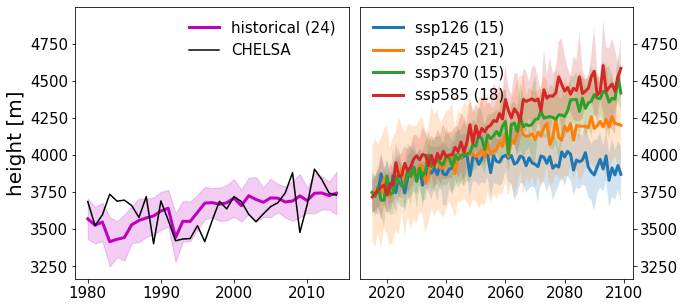

In [55]:
fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0.04)
(ax1, ax2) = gs.subplots( sharey='row')


ax1.plot(range(1980,2015),np.percentile(zero_height_all,50,axis=0),'m-',
         alpha=1, lw=3, label="historical (24)")
mstd = np.std(zero_height_all,axis=0)

ax1.fill_between(range(1980,2015),np.percentile(zero_height_all,50,axis=0) + mstd,
                np.percentile(zero_height_all,50,axis=0) - mstd,
                color='m', alpha=0.2)
ax1.plot(range(1980,2015),zero_height,'k-', label="CHELSA")
#ax1.set_title("AMJJAS mean", fontsize=20);
ax1.set_ylabel("height [m]", fontsize=20)
#ax1.set_xlabel("Time", fontsize=20)

# SSPs
ssp= ["ssp126 (15)","ssp245 (21)","ssp370 (15)","ssp585 (18)"]
#for i in range(4):
#    ax3.plot(range(2045,2070),np.nanpercentile(zero_height_all_ssp_45_69[i,:,:].squeeze(),50,axis=0),
#             alpha=1, lw=3, label=ssp[i])
#    mstd = np.nanstd(zero_height_all_ssp_45_69[i,:,:].squeeze(),axis=0)
#
#    ax3.fill_between(range(2045,2070),np.nanpercentile(zero_height_all_ssp_45_69[i,:,:].squeeze(),
#                                                       50,axis=0) + mstd,
#                    np.nanpercentile(zero_height_all_ssp_45_69[i,:,:].squeeze(),50,axis=0) - mstd,
#                    alpha=0.2)
    
for i in range(4):
    ax2.plot(range(2015,2100),np.nanpercentile(zero_height_all_ssp_2015_2099[i,:,:].squeeze(),50,axis=0),
             alpha=1, lw=3, label=ssp[i])
    mstd = np.nanstd(zero_height_all_ssp_2015_2099[i,:,:].squeeze(),axis=0)

    ax2.fill_between(range(2015,2100),np.nanpercentile(zero_height_all_ssp_2015_2099[i,:,:].squeeze(),
                                                       50,axis=0) + mstd,
                    np.nanpercentile(zero_height_all_ssp_2015_2099[i,:,:].squeeze(),50,axis=0) - mstd,
                    alpha=0.2)

    
#for i in range(4):
#    ax4.plot(range(2070,2100),np.nanpercentile(zero_height_all_ssp_70_99[i,:,:].squeeze(),50,axis=0),
#             alpha=1, lw=3, label=ssp[i])
#    mstd = np.nanstd(zero_height_all_ssp_70_99[i,:,:].squeeze(),axis=0)
#
#    ax4.fill_between(range(2070,2100),np.nanpercentile(zero_height_all_ssp_70_99[i,:,:].squeeze(),
#                                                       50,axis=0) + mstd,
#                    np.nanpercentile(zero_height_all_ssp_70_99[i,:,:].squeeze(),50,axis=0) - mstd,
#                    alpha=0.2)
#ax2.set_yticks([])
plt.setp(ax2.get_yticklabels(), visible=True)
ax2.legend(frameon=False, fontsize=15)
ax1.legend(frameon=False, fontsize=15)
ax2.yaxis.tick_right()
ax2.yaxis.set_tick_params(labelright='on')
ax2.yaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.xaxis.set_tick_params(labelsize=15)
ax2.xaxis.set_tick_params(labelsize=15)

#ax4.yaxis.set_tick_params(labelsize=15)
#ax3.yaxis.set_tick_params(labelsize=15)
#ax3.xaxis.set_tick_params(labelsize=15)
#ax4.xaxis.set_tick_params(labelsize=15)
#


/tmp/ipykernel_7975/847625824.py:124: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('myplot.png', dpi=300, bbox_inches='tight', optimize=True)


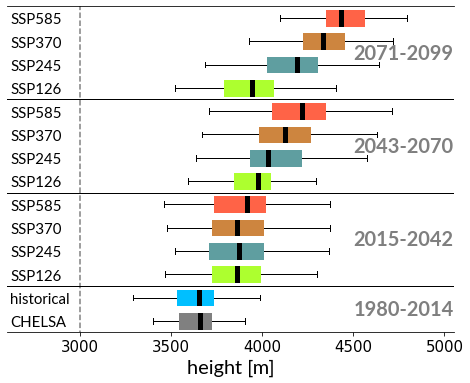

In [56]:
# plot box plot 
csfont = {'fontname':'Lato'}
hfont = {'fontname':'Helvetica'}

fig = plt.figure(figsize=(8,6))
# Create an axes instance
ax = fig.add_subplot(111)
zero_height_all_ssp = zero_height_all_ssp_2015_2099.copy()
# filter nans 
# 2015-2042
ssp126_1 = zero_height_all_ssp[0,:,0:28][~np.isnan(zero_height_all_ssp[0,:,0:28])]
ssp245_1 = zero_height_all_ssp[1,:,0:28][~np.isnan(zero_height_all_ssp[1,:,0:28])]
ssp370_1 = zero_height_all_ssp[2,:,0:28][~np.isnan(zero_height_all_ssp[2,:,0:28])]
ssp585_1 = zero_height_all_ssp[3,:,0:28][~np.isnan(zero_height_all_ssp[3,:,0:28])]
# 2043-2070
ssp126_2 = zero_height_all_ssp[0,:,28:56][~np.isnan(zero_height_all_ssp[0,:,28:56])]
ssp245_2 = zero_height_all_ssp[1,:,28:56][~np.isnan(zero_height_all_ssp[1,:,28:56])]
ssp370_2 = zero_height_all_ssp[2,:,28:56][~np.isnan(zero_height_all_ssp[2,:,28:56])]
ssp585_2 = zero_height_all_ssp[3,:,28:56][~np.isnan(zero_height_all_ssp[3,:,28:56])]
# 2071-2099

ssp126_3 = zero_height_all_ssp[0,:,56:][~np.isnan(zero_height_all_ssp[0,:,56:])]
ssp245_3 = zero_height_all_ssp[1,:,56:][~np.isnan(zero_height_all_ssp[1,:,56:])]
ssp370_3 = zero_height_all_ssp[2,:,56:][~np.isnan(zero_height_all_ssp[2,:,56:])]
ssp585_3 = zero_height_all_ssp[3,:,56:][~np.isnan(zero_height_all_ssp[3,:,56:])]

# plot boxplot 

bp =ax.boxplot([zero_height, zero_height_all.reshape(-1),
               ssp126_1.squeeze().reshape(-1),
               ssp245_1.squeeze().reshape(-1),
               ssp370_1.squeeze().reshape(-1),
               ssp585_1.squeeze().reshape(-1),
                
               ssp126_2.squeeze().reshape(-1),
               ssp245_2.squeeze().reshape(-1),
               ssp370_2.squeeze().reshape(-1),
               ssp585_2.squeeze().reshape(-1),
                
               ssp126_3.squeeze().reshape(-1),
               ssp245_3.squeeze().reshape(-1),
               ssp370_3.squeeze().reshape(-1),
               ssp585_3.squeeze().reshape(-1)],
               patch_artist=True,vert=False)
## change outline color, fill color and linewidth of the boxes
k=0
for box in bp['boxes']:
    # change outline color
    if k==0 :
        box.set( color='gray', linewidth=5)
        # change fill color
        box.set( facecolor = 'gray' )
    if k==1:
        box.set( color='deepskyblue', linewidth=5)
        # change fill color
        box.set( facecolor = 'deepskyblue' )
    if (k==2) or (k==6) or (k==10):
        box.set( color='greenyellow', linewidth=5)
        # change fill color
        box.set( facecolor = 'greenyellow' )
    if (k==3) or (k==7) or (k==11):
        box.set( color='cadetblue', linewidth=5)
        # change fill color
        box.set( facecolor = 'cadetblue' )  
    if (k==4) or (k==8) or (k==12):
        box.set( color='peru', linewidth=5)
        # change fill color
        box.set( facecolor = 'peru' )
    if (k==5) or (k==9) or (k==13):
        box.set( color='tomato', linewidth=5)
        # change fill color
        box.set( facecolor = 'tomato' )  
    k+=1
    
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='k', linewidth=1)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='k', linewidth=1)
    
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='k', linewidth=5)
    
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.0)
## Custom x-axis labels
ax.set_yticklabels([ 'CHELSA','historical', 
                    "SSP126",
                   "SSP245",
                   "SSP370",
                   "SSP585",
                   "SSP126",
                   "SSP245",
                   "SSP370",
                   "SSP585",
                   "SSP126",
                   "SSP245",
                   "SSP370",
                   "SSP585"], **csfont, fontsize=15, rotation=0, ha="left");
ax.text(4500,1.25,'1980-2014', **csfont, fontsize=20, weight='bold', rotation=0, alpha=.5)
ax.text(4500,4.25,'2015-2042', **csfont, fontsize=20, weight='bold', rotation=0, alpha=.5)
ax.text(4500,8.25,'2043-2070', **csfont, fontsize=20, weight='bold', rotation=0, alpha=.5)
ax.text(4500,12.25,'2071-2099', **csfont, fontsize=20, weight='bold', rotation=0, alpha=.5)

plt.hlines(2.5,xmin=2000,xmax=5100, linestyle="-", color="k",lw=1)
plt.vlines(3000,ymin=0,ymax=15, linestyle="--", color="k", alpha=.5)
plt.hlines(6.5,xmin=2000,xmax=5100, linestyle="-", color="k",lw=1)
plt.hlines(10.5,xmin=2000,xmax=5100, linestyle="-", color="k",lw=1)

plt.xlim([2600, 5050])
plt.ylim([0.5, 14.5])
ax.tick_params(axis="y",direction="in", pad=-3)
plt.minorticks_off()
ax.xaxis.set_tick_params(labelsize=15)
ax.set_xlabel("height [m]",**csfont, fontsize=20)
# Hide the right and top spines
ax.spines[['left','right']].set_visible(False)
plt.tick_params(left = False)
# Save the plot with high quality and small size
plt.savefig('myplot.png', dpi=300, bbox_inches='tight', optimize=True)

In [ ]:
2043+28

## Plotting the topography 

<ipython-input-2-c19bf516ab27>:12: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  dem = xr.open_rasterio(filename)
/home/fallah/anaconda3/envs/glaciers/lib/python3.8/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)


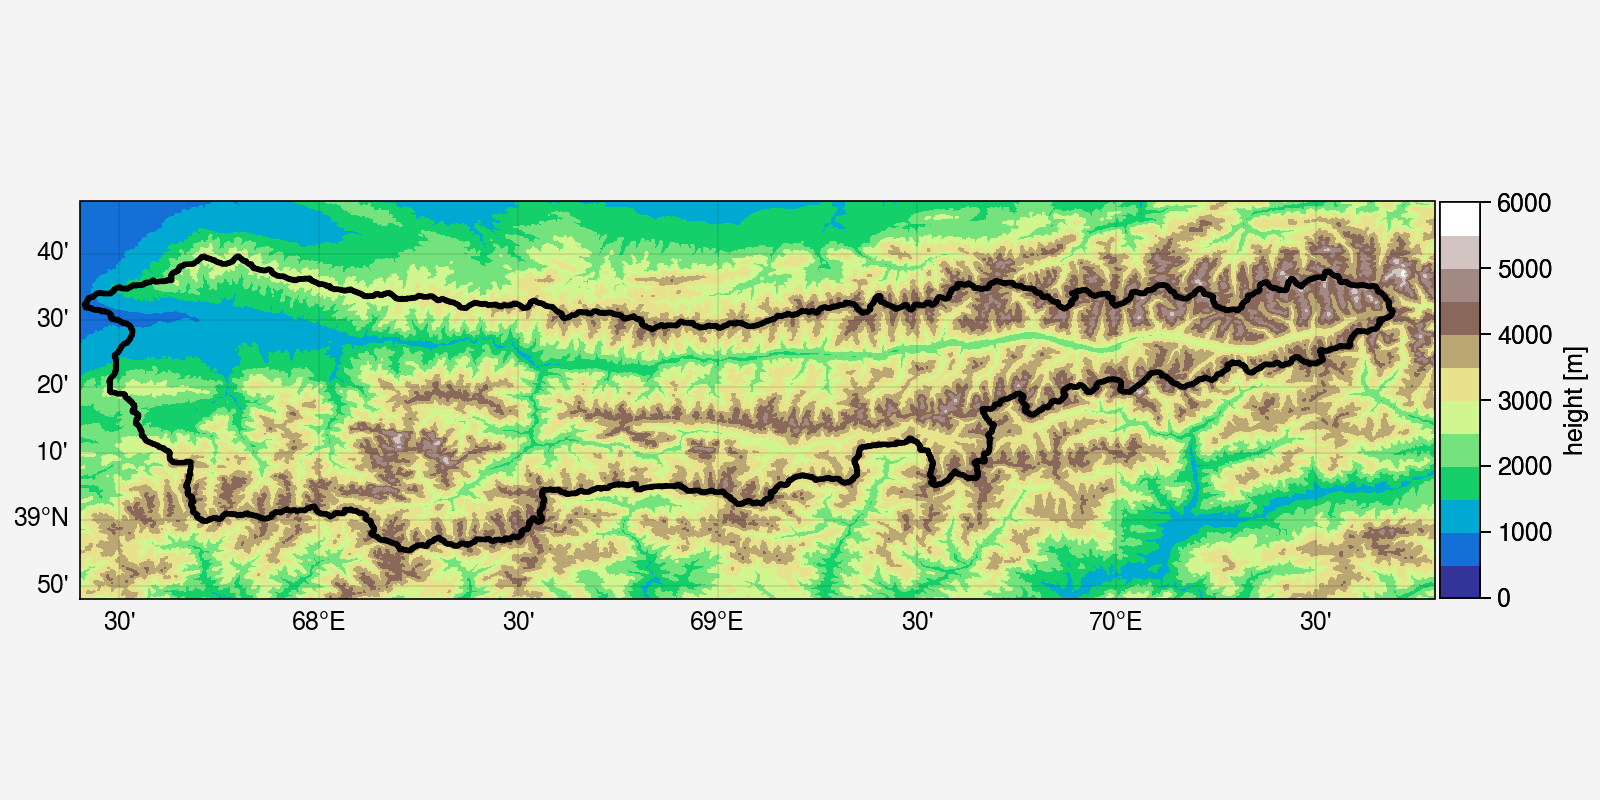

In [2]:
filename="/home/fallah/Downloads/rasters_SRTMGL3/output_SRTMGL3.tif"
import matplotlib.pyplot as plt
import proplot as plot
import numpy as np
from osgeo import gdal
import xarray as xr
import geopandas as gpd
import shapefile as shp  # Requires the pyshp package
# Open the TIFF file and read the elevation data
#filename = "elevation.tif"
#dataset = gdal.Open(filename, gdal.GA_ReadOnly)
dem = xr.open_rasterio(filename)
dem = dem[0]

# Define extents
lat_min = 38.8
lat_max = 39.8
lon_min = 67.4
lon_max = 70.8

#Starting the plotting
fig, axs = plot.subplots(proj=('cyl'), figsize=(8,4))
#format the plot
axs.format(
    lonlim=(lon_min, lon_max), latlim=(lat_min, lat_max),
    land=False, labels=True, innerborders=True
)
#Plot
#lat,38.8,39.8 -d lon,67.4,70.8
path = '../../ML_river/data/files/zeravshan/zerav_catchment_converted.shp'
sf = shp.Reader(path)
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y, color="k", lw=2)
    
#axs = basin.plot(color="lightgray");
m = axs.contourf(dem,levels = np.linspace(0, 6000, 13) ,cmap='terrain')



cbar = fig.colorbar(m,ax=axs, loc='b', label='height [m]',
                    pad=0.2, shrink=.51,aspect=30) #Adding colorbar with label

# Save the plot with high quality and small size
plt.savefig('topography.png', bbox_inches='tight',pad_inches = 0, optimize=True)


## Plottung the bigger mp with the basin box inside it

In [1]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
# Define extents
lat_min = 38.8
lat_max = 39.8
lon_min = 67.4
lon_max = 70.8

fig.update_geos(
    resolution=50,
    showland=True,
    landcolor="LightGray",
    showcoastlines=True,
    coastlinecolor="Black",
    showcountries=True,
    countrycolor="Black",
    scope="asia"
)

fig.add_trace(go.Scattergeo(
    lat=[lat_min, lat_min, lat_max, lat_max, lat_min], # example coordinates
    lon=[lon_min, lon_max, lon_max, lon_min, lon_min], # example coordinates
    mode="lines",
    line=dict(color="Red", width=3)
))

fig.show()

In [2]:
import plotly.graph_objects as go

fig = go.Figure()

# Add a Scattergeo trace to plot the countries
fig.add_trace(go.Scattergeo(
    locationmode = "ISO-3", # use ISO-3 codes as locations
    locations = ["KAZ", "TKM", "TJK", "UZB", "KGZ"], # list of countries to plot
    mode = "text", # use text labels instead of markers
    text = ["Kazakhstan", "Turkmenistan", "Tajikistan", "Uzbekistan", "Kyrgyzstan"], # list of country names to display
    textposition = "middle center", # position the text on the center of the locations
    textfont = dict(size=20) # set the font size to 16 pixels
))

# Add another Scattergeo trace to plot the box region
fig.add_trace(go.Scattergeo(
    lat=[lat_min, lat_min, lat_max, lat_max, lat_min], # example coordinates
    lon=[lon_min, lon_max, lon_max, lon_min, lon_min], # example coordinates
    mode="lines",
    line=dict(color="Red", width=3)
))

# Update the Geo object in the layout
fig.update_geos(
    resolution=50,
    showland=True,
    landcolor="LightGray",
    showcoastlines=True,
    coastlinecolor="Black",
    showcountries=True,
    countrycolor="Black",
    fitbounds="locations" # adjust the map bounds to fit the locations
)

# Update the figure layout to remove the legend
fig.update_layout(showlegend=False)
# Save the figure as a PDF file with a width of 800 pixels and a height of 600 pixels
pio.write_image(fig, "map.png", width=800, height=600)
# Show the figure
fig.show()

NameError: name 'pio' is not defined

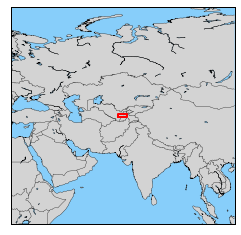

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Define the lower left and upper right corners of the region to plot
lat_min = 38.8
lat_max = 39.8
lon_min = 67.4
lon_max = 70.8
llcrnrlon = 67.4
llcrnrlat = 38.8
urcrnrlon = 70.8
urcrnrlat = 39.8
dx =40
# Create a Basemap instance with an orthographic projection
# Create a Basemap instance with a cylindrical projection and the specified region
m = Basemap(projection='cyl', llcrnrlon=llcrnrlon-dx, llcrnrlat=llcrnrlat-dx,
            urcrnrlon=urcrnrlon+dx, urcrnrlat=urcrnrlat+dx, resolution='l')


# Draw coastlines and country boundaries
m.drawcoastlines(linewidth=.31)
m.drawcountries(linewidth=.31)
m.fillcontinents(color = 'lightgrey', lake_color = 'lightskyblue')
m.drawmapboundary(fill_color = 'lightskyblue')
# Draw a rectangle to indicate the region of interest
m.plot([llcrnrlon, llcrnrlon, urcrnrlon, urcrnrlon, llcrnrlon],
       [llcrnrlat, urcrnrlat, urcrnrlat, llcrnrlat, llcrnrlat],
       latlon=True, color='red', linewidth=2)
# Add labels to the countries
fsize = 7
#plt.text(66, 34, 'Afghanistan', fontsize=fsize, ha='center', va='center')
#plt.text(71, 39, 'Tajikistan', fontsize=fsize, ha='center', va='center')
#plt.text(75, 42, 'Kyrgyzstan', fontsize=fsize, ha='center', va='center')
#plt.text(64, 42, 'Uzbekistan', fontsize=fsize, ha='center', va='center')
#plt.text(59, 40, 'Turkmenistan', fontsize=fsize, ha='center', va='center')
#plt.text(68, 48, 'Kazakhstan', fontsize=fsize, ha='center', va='center')
# Save the figure to a file with no white space around it
plt.savefig('map.png', bbox_inches='tight',dpi=300)
# Show the plot
plt.show()

## Plot the Zero height isotherm maps 

In [3]:
def plot_map_netcdf(var, vmin,vmax,cmap,number,out_file, cbar):
    import proplot as plot
    import shapefile as shp  # Requires the pyshp package
    import numpy as np
    # Define extents
    lat_min = 38.8
    lat_max = 39.8
    lon_min = 67.4
    lon_max = 70.8
    
    #Starting the plotting
    fig, axs = plot.subplots(proj=('cyl'), figsize=(8,4))
    
    #format the plot
    axs.format(
        lonlim=(lon_min, lon_max), latlim=(lat_min, lat_max),
        land=False, labels=False, innerborders=True
    )
    #Plot
    #lat,38.8,39.8 -d lon,67.4,70.8
    path = '../../ML_river/data/files/zeravshan/zerav_catchment_converted.shp'
    sf = shp.Reader(path)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x,y, color="k", lw=2)
        
    #axs = basin.plot(color="lightgray");
    m = axs.contourf(var,levels = np.linspace(vmin, vmax, number) ,cmap=cmap)
    
    
    if cbar : 
        cbar = fig.colorbar(m,ax=axs, loc='b', label='fraction',
                            pad=0.2, shrink=.55,aspect=30) #Adding colorbar with label
    
    # Save the plot with high quality and small size
    #plt.margins(0,0)

    plt.savefig(out_file,bbox_inches='tight',pad_inches = 0, optimize=True)
    

cdo(1) selyear: Process started
cdo(2) expr: Process started
cdo(2) expr: Processed 1 variable over 12784 timesteps.
cdo(1) selyear: Processed 69544960 values from 1 variable over 12784 timesteps.
cdo    timmean: Processed 69544960 values from 1 variable over 12784 timesteps [1.10s 38MB].
/home/fallah/.local/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/fallah/.local/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)


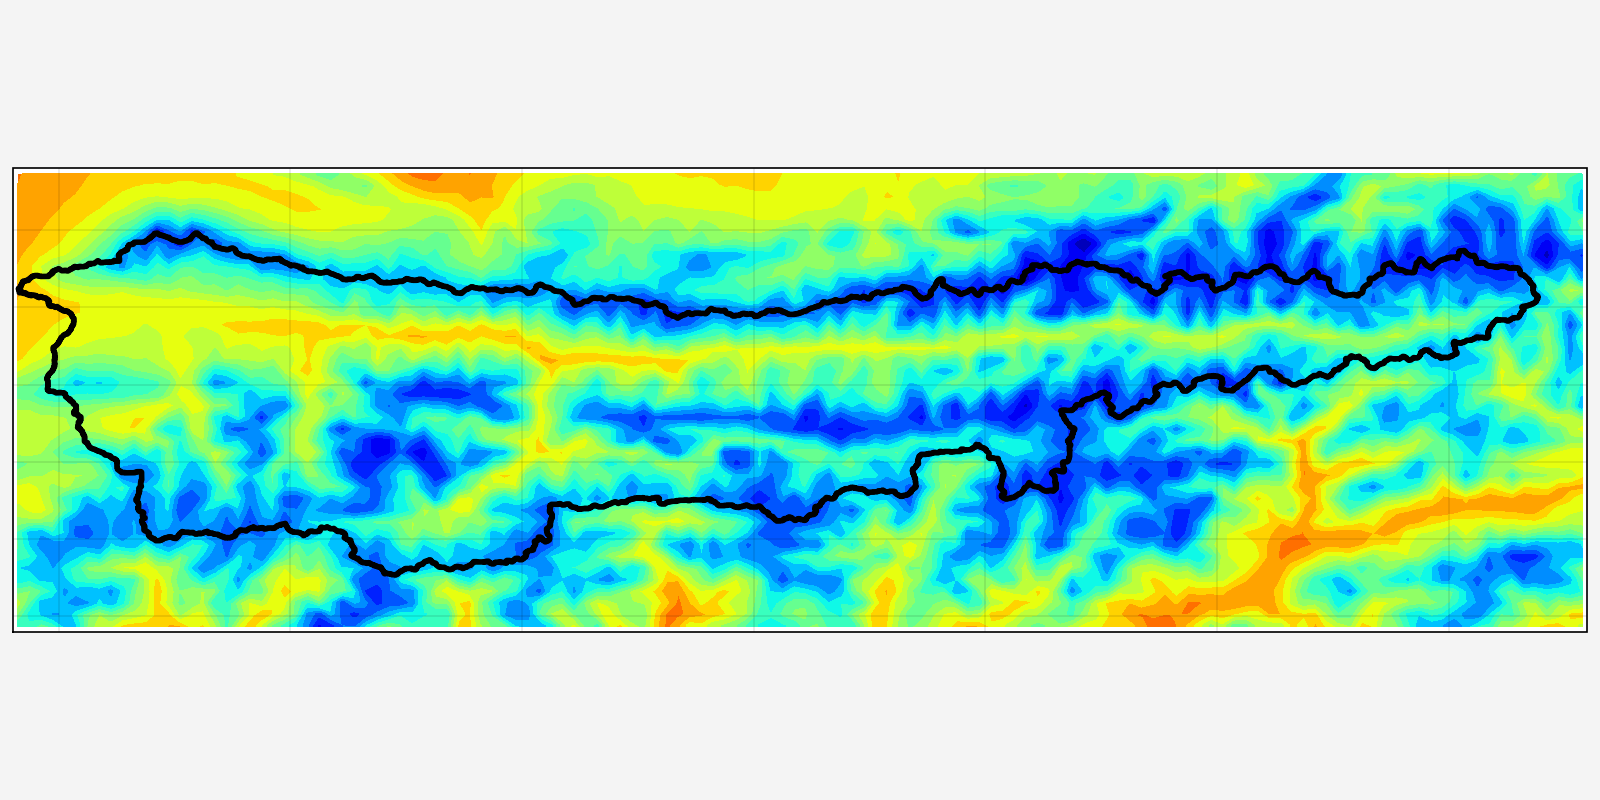

In [16]:
# prepare the CHELSA : 
file = "/home/fallah/Documents/SCRIPTS/DeepSD/outputs/chelsa_CA_1980_2014.nc" 
cmd = "cdo -O -L -timmean -selyear,1979/2014 -expr,'mask=tasmin<=273.15' "+file+" output1.nc"
os.system(cmd)
chelsa_map = xr.open_dataset('output1.nc')
plot_map_netcdf(chelsa_map.mask.squeeze(), 0,1,'Jet_r',21,'chelsa_map.png', False)
chelsa_map.close()

!rm output1.nc

In [17]:
# historical ensmedian: 
files = "/home/fallah/Documents/SCRIPTS/DeepSD/notebooks/*historical*1980_2014.nc"
cmd = "cdo -O -L -timmean -selyear,1980/2014 -expr,'mask=tasmin<=273.15' -ensmean "+files+" output2.nc"
os.system(cmd)

cdo(1) selyear: Process started
cdo(2) expr: Process started
cdo(3) ensmean: Process started
cdo(3) ensmean: Processed 24 variables over 315362 timesteps.
cdo(2) expr: Processed 71481600 values from 1 variable over 13140 timesteps.
cdo(1) selyear: Processed 71481600 values from 1 variable over 13140 timesteps.
cdo    timmean: Processed 71481600 values from 1 variable over 13140 timesteps [19.95s 355MB].


0

/home/fallah/.local/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/fallah/.local/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)


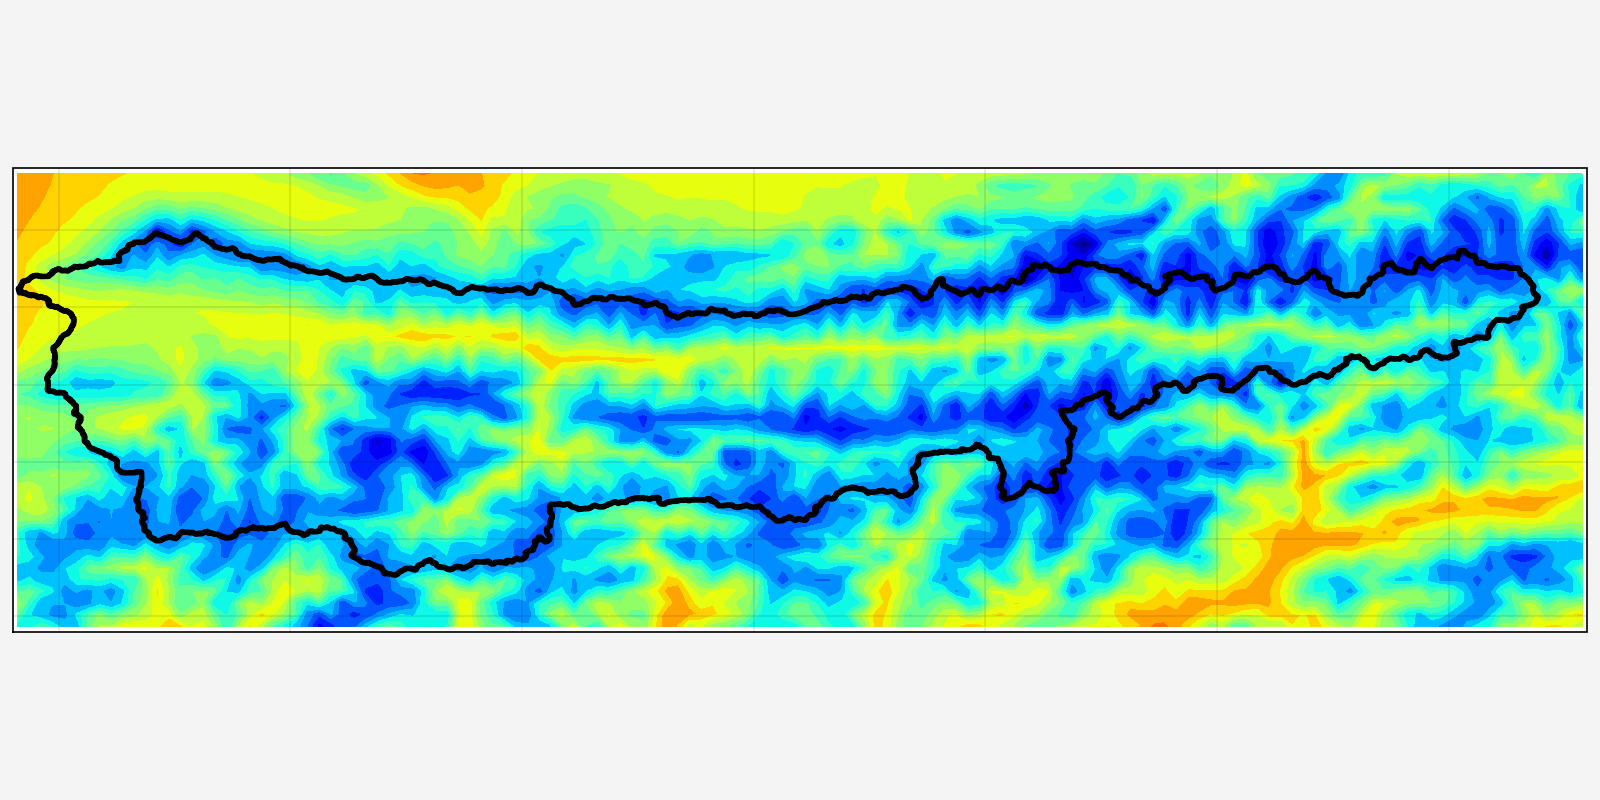

In [18]:
historical_map = xr.open_dataset('output2.nc')
plot_map_netcdf(historical_map.mask.squeeze(), 0,1,'Jet_r',21,'historical_map.png', False)
historical_map.close()
!rm output2.nc

In [19]:
# ssp126 2070-2099
files = "/home/fallah/Documents/SCRIPTS/DeepSD/notebooks/*ssp126*2070_2099.nc"
cmd = "cdo -O -L -timmean -selyear,2070/2099  -expr,'mask=tasmin<=273.15' -ensmean "+files+" output.nc"
os.system(cmd)




cdo(1) selyear: Process started
cdo(2) expr: Process started
cdo(3) ensmean: Process started
cdo(3) ensmean: Processed 15 variables over 164251 timesteps.
cdo(2) expr: Processed 59568000 values from 1 variable over 10950 timesteps.
cdo(1) selyear: Processed 59568000 values from 1 variable over 10950 timesteps.
cdo    timmean: Processed 59568000 values from 1 variable over 10950 timesteps [9.02s 94MB].


0

/home/fallah/.local/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lon: 136, lat: 40)
Coordinates:
  * time       (time) datetime64[ns] 2084-12-27T12:00:00
  * lon        (lon) float64 67.41 67.44 67.46 67.49 ... 70.71 70.74 70.76 70.79
  * lat        (lat) float64 38.81 38.84 38.86 38.89 ... 39.71 39.74 39.76 39.79
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    mask       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Apr 25 13:08:34 2023: cdo -O -L -timmean -selyear,2070/...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...


/home/fallah/.local/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)


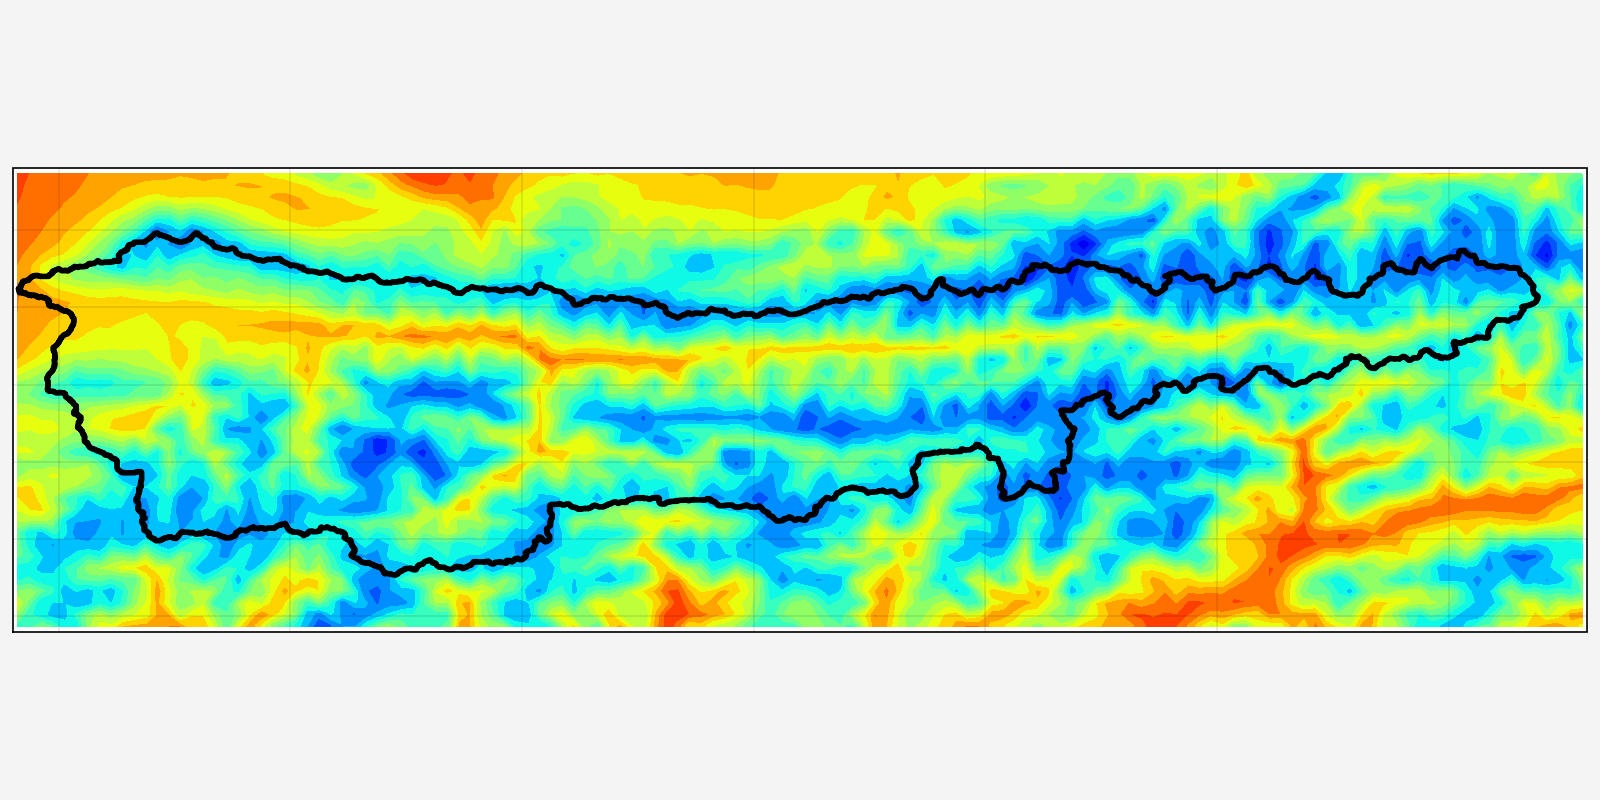

In [20]:
historical_map = xr.open_dataset('output.nc')
print(historical_map)
plot_map_netcdf(historical_map.mask.squeeze(), 0,1,'Jet_r',21,'ssp126_map_2070_2099.png', False)
historical_map.close()
#!rm output.nc

In [21]:
# ssp245 2070-2099
files = "/home/fallah/Documents/SCRIPTS/DeepSD/notebooks/*ssp245*2070_2099.nc"
cmd = "cdo -O -L -timmean -selyear,2070/2099  -expr,'mask=tasmin<=273.15' -ensmean "+files+" output.nc"
os.system(cmd)


cdo(1) selyear: Process started
cdo(2) expr: Process started
cdo(3) ensmean: Process started
cdo(3) ensmean: Processed 21 variables over 229951 timesteps.
cdo(2) expr: Processed 59568000 values from 1 variable over 10950 timesteps.
cdo(1) selyear: Processed 59568000 values from 1 variable over 10950 timesteps.
cdo    timmean: Processed 59568000 values from 1 variable over 10950 timesteps [11.66s 122MB].


0

/home/fallah/.local/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/fallah/.local/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)


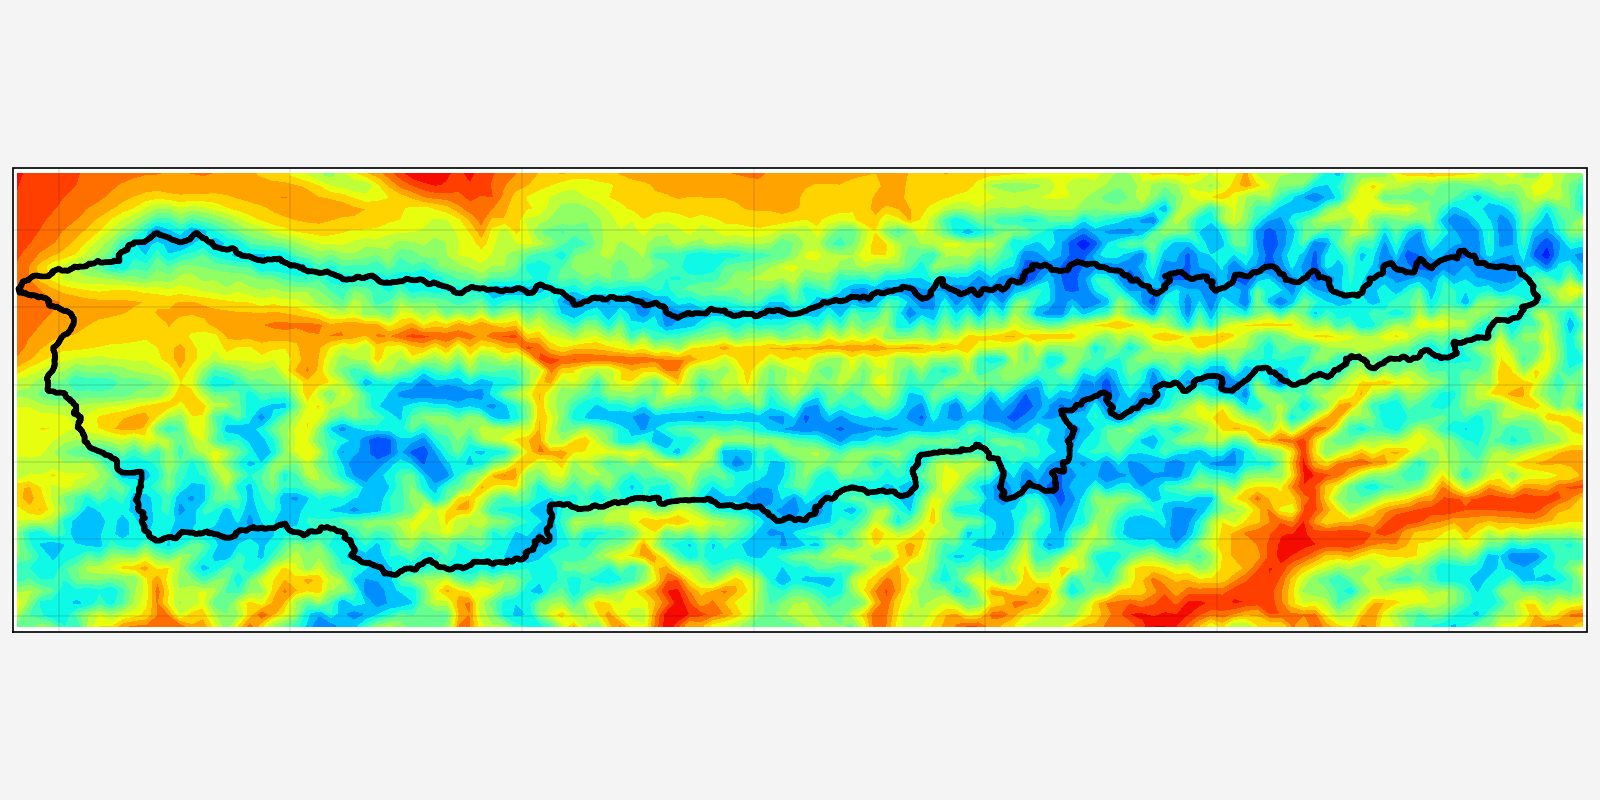

In [22]:
historical_map = xr.open_dataset('output.nc')
plot_map_netcdf(historical_map.mask.squeeze(), 0,1,'Jet_r',21,'ssp245_map_2070_2099.png', False)
historical_map.close()
!rm output.nc

In [23]:
# ssp370 2070-2099
files = "/home/fallah/Documents/SCRIPTS/DeepSD/notebooks/*ssp370*2070_2099.nc"
cmd = "cdo -O -L -timmean -selyear,2070/2099  -expr,'mask=tasmin<=273.15' -ensmean "+files+" output.nc"
os.system(cmd)


cdo(1) selyear: Process started
cdo(2) expr: Process started
cdo(3) ensmean: Process started
cdo(3) ensmean: Processed 15 variables over 164251 timesteps.
cdo(2) expr: Processed 59568000 values from 1 variable over 10950 timesteps.
cdo(1) selyear: Processed 59568000 values from 1 variable over 10950 timesteps.
cdo    timmean: Processed 59568000 values from 1 variable over 10950 timesteps [8.92s 94MB].


0

/home/fallah/.local/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/fallah/.local/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)


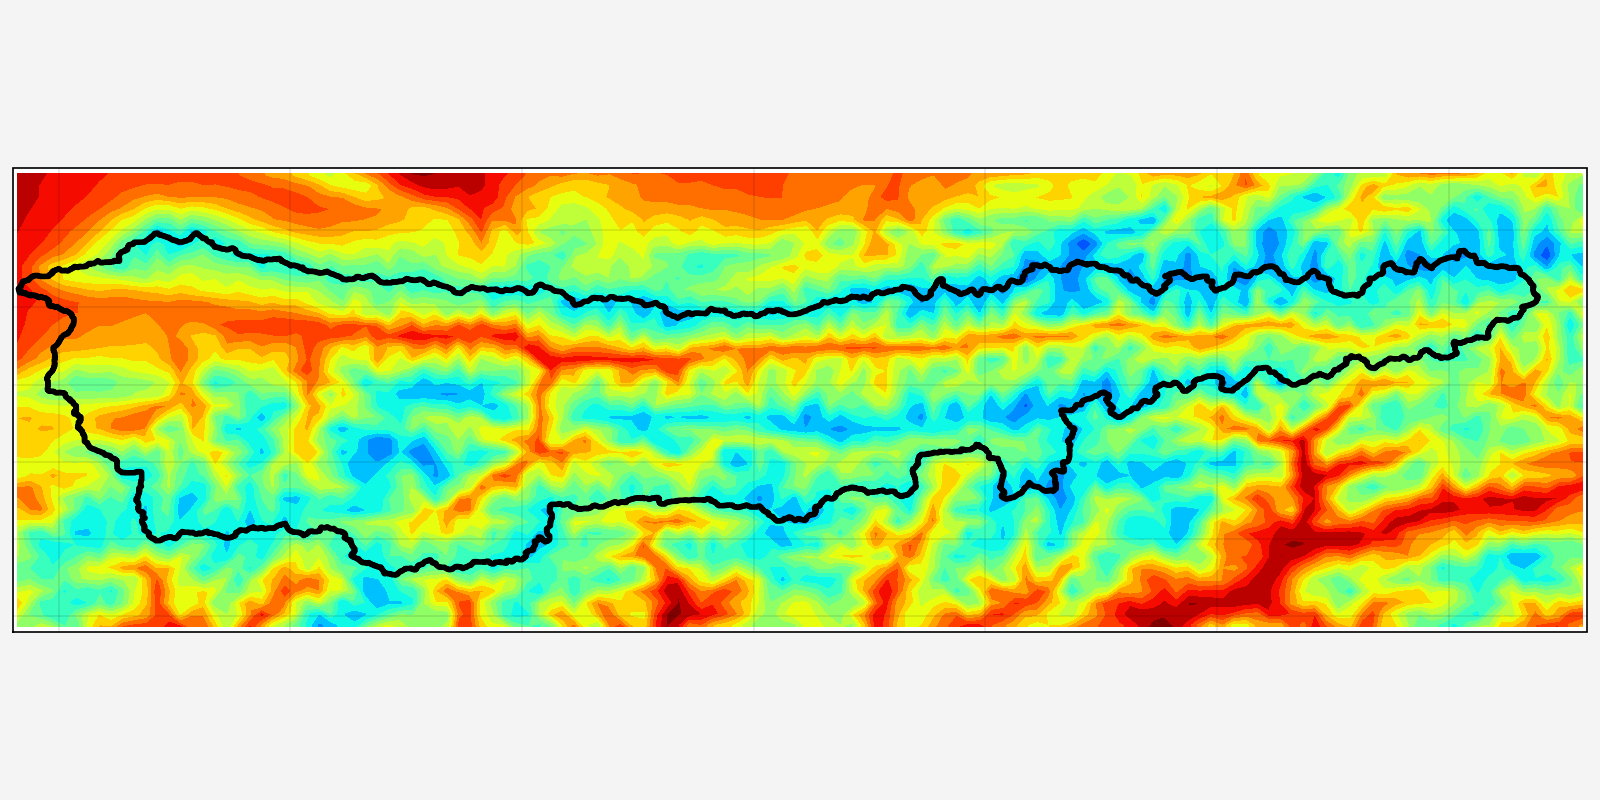

In [24]:
historical_map = xr.open_dataset('output.nc')
plot_map_netcdf(historical_map.mask.squeeze(), 0,1,'Jet_r',21,'ssp370_map_2070_2099.png', False)
historical_map.close()
!rm output.nc

In [4]:
# ssp585 2070-2099
files = "/home/fallah/Documents/SCRIPTS/DeepSD/notebooks/*ssp585*2070_2099.nc"
cmd = "cdo -O -L -timmean -selyear,2070/2099  -expr,'mask=tasmin<=273.15' -ensmean "+files+" output.nc"
os.system(cmd)


0

<frozen importlib._bootstrap>:219: UserWarning: PROJ 8+ is required. Current version: 7.0.1
/home/fallah/anaconda3/envs/glaciers/lib/python3.8/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: print_figure() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  return func(self, *args, **kwargs)


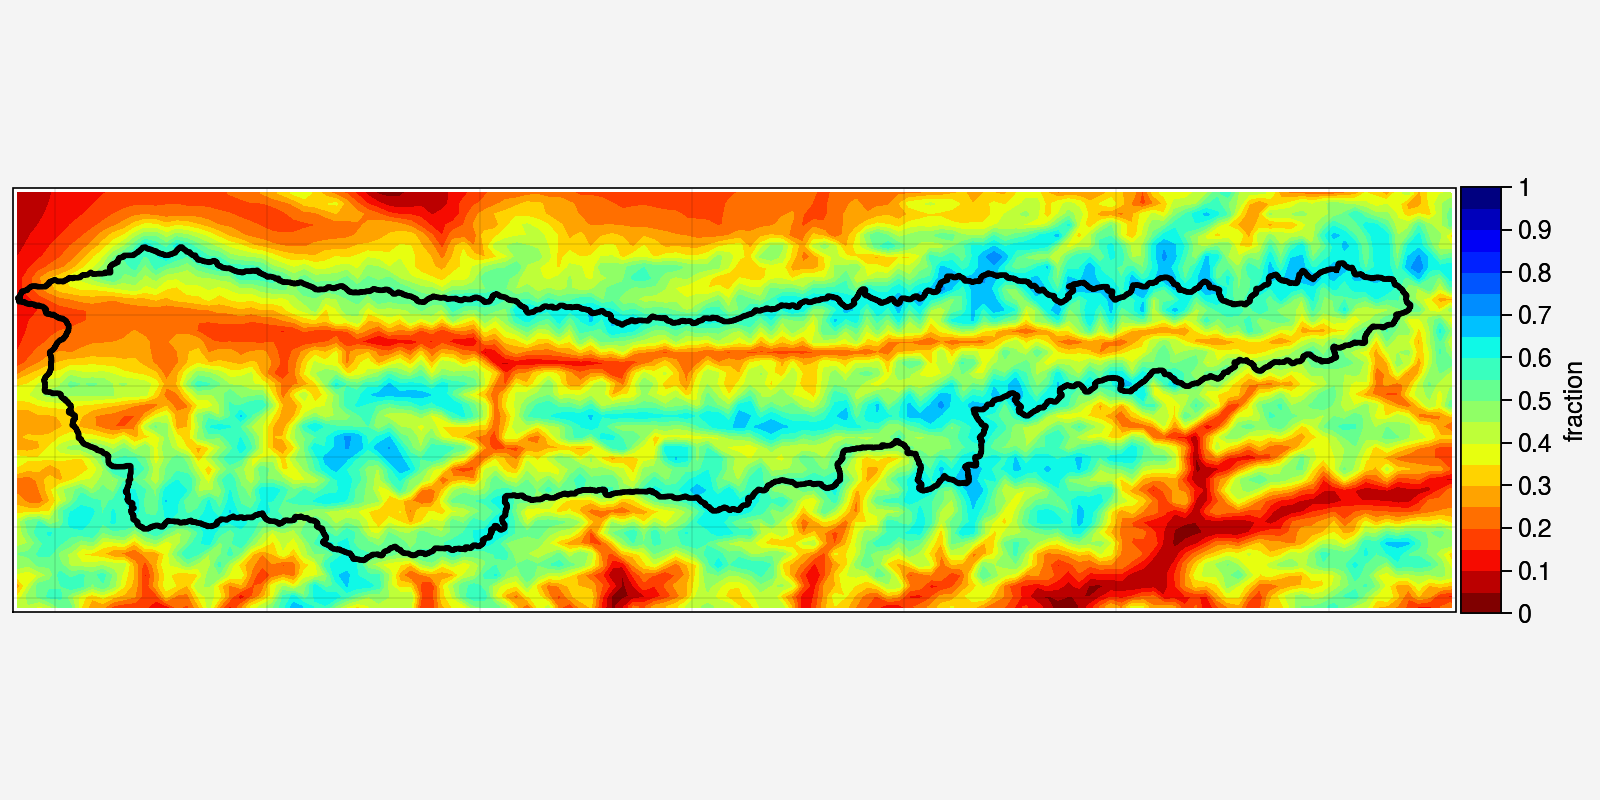

In [5]:
historical_map = xr.open_dataset('output.nc')
plot_map_netcdf(historical_map.mask.squeeze(), 0,1,'Jet_r',21,'ssp585_map_2070_2099.png', True)
historical_map.close()
#!rm output.nc